In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv', header=1)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.shape

(246, 14)

In [5]:
df.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [6]:
def detail_info(df):
    temp_df = pd.DataFrame(index= df.columns)
    
    temp_df['data_type'] = df.dtypes
    temp_df['unique_val'] = df.nunique()
    temp_df['duplicate_val'] = df.duplicated().sum()
    temp_df['missing_val'] = df.isnull().sum()
    temp_df['missing_val_%'] = round(df.isnull().mean()*100,2)
    
    return temp_df

In [7]:
detail_info(df)

,data_type,unique_val,duplicate_val,missing_val,missing_val_%
day,object,33,0,0,0.00
month,object,5,0,1,0.41
year,object,2,0,1,0.41
Temperature,object,20,0,1,0.41
RH,object,63,0,1,0.41
Ws,object,19,0,1,0.41
Rain,object,40,0,1,0.41
FFMC,object,174,0,1,0.41
DMC,object,167,0,1,0.41
DC,object,199,0,1,0.41


In [8]:
# Index 122 & 123 needs to be deleted

df.loc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


In [9]:
df.drop(df.iloc[122:124].index, axis=0, inplace=True)
df = df.reset_index(drop=True)

In [10]:
df.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


In [11]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [12]:
# Columns - ' RH', ' Ws', 'Rain ' & 'Classes  ' have extra space in their name

df.columns = df.columns.str.strip()

In [13]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [14]:
# Output class-'Classess' should have binary output as 'Fire' or 'Not Fire' but it is showing 9
# Output class-'Classess' has one missing value

In [15]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [16]:
# Let's remove extra white spaces from each column

for feature in df.columns:
    df[feature]= df[feature].str.strip()

In [17]:
df.Classes.unique()    

array(['not fire', 'fire', nan], dtype=object)

### Handling Missing values

In [18]:
# Find the missing value columns along with its number of missing values

for feature in df.columns:
    if df[feature].isnull().sum()>0:
        print(feature, df[feature].isnull().sum(), round((df[feature].isnull().mean()*100),2))
    

Classes 1 0.41


In [19]:
# Find the row which has missing value

df[df['Classes'].isnull()==True]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [20]:
# Let's see the dataframe for nearby index of 165
# It seems that 'DC' column has aggregated the value of 'ISI' column which resulted displacement of rest of the values of row
# let's handle it instead of deleting row, as we have very few data points in our dataset

df.loc[162:168]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
162,11,07,2012,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,not fire
163,12,07,2012,36,44,13,0,90.1,12.6,19.4,8.3,12.5,9.6,fire
164,13,07,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN
166,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire
167,16,07,2012,31,83,17,0,84.5,19.4,33.1,4.7,19.2,7.3,fire
168,17,07,2012,32,81,17,0,84.6,21.1,42.3,4.7,20.9,7.7,fire


In [21]:
df['Classes'].iloc[165] = df['FWI'].iloc[165]
df['FWI'].iloc[165] = df['BUI'].iloc[165]
df['BUI'].iloc[165] = df['ISI'].iloc[165]
df['ISI'].iloc[165] = df['DC'].iloc[165].split(' ')[1].strip()
df['DC'].iloc[165] = df['DC'].iloc[165].split(' ')[0].strip()

In [22]:
df.iloc[162:168]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
162,11,07,2012,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,not fire
163,12,07,2012,36,44,13,0,90.1,12.6,19.4,8.3,12.5,9.6,fire
164,13,07,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6,9,12.5,10.4,fire
166,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire
167,16,07,2012,31,83,17,0,84.5,19.4,33.1,4.7,19.2,7.3,fire


In [23]:
detail_info(df)

,data_type,unique_val,duplicate_val,missing_val,missing_val_%
day,object,31,0,0,0.0
month,object,4,0,0,0.0
year,object,1,0,0,0.0
Temperature,object,19,0,0,0.0
RH,object,62,0,0,0.0
Ws,object,18,0,0,0.0
Rain,object,39,0,0,0.0
FFMC,object,173,0,0,0.0
DMC,object,166,0,0,0.0
DC,object,198,0,0,0.0


In [24]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [25]:
# Lets change the dataypes:

for feature in ['day', 'month', 'year']:
    df[feature]= df[feature].astype('int64') 

for feature in ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']:
    df[feature]= df[feature].astype('float64')
  

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(10), int64(3), object(1)
memory usage: 26.8+ KB


In [27]:
# Creating a feature 'Region'
# Method # 1 : List Comprehension

df['Region'] = [str('Bejaia') if x<=121 else str('Sidi-Bel Abbes') for x in range(df.shape[0])]

In [28]:
# Method # 2

#df.loc[:122, 'Region'] = 'Bejaia'
#df.loc[122:, 'Region'] = 'Sidi-Bel Abbes'

In [29]:
df.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,9,2012,26.0,80.0,16.0,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,Bejaia
121,30,9,2012,25.0,78.0,14.0,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire,Bejaia
122,1,6,2012,32.0,71.0,12.0,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,Sidi-Bel Abbes
123,2,6,2012,30.0,73.0,13.0,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,Sidi-Bel Abbes
124,3,6,2012,29.0,80.0,14.0,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,Sidi-Bel Abbes


In [30]:
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])

In [31]:
df['day_name'] = df['date'].dt.day_name().str[0:3]

In [32]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date,day_name
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia,2012-06-01,Fri
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia,2012-06-02,Sat
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia,2012-06-03,Sun
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia,2012-06-04,Mon
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia,2012-06-05,Tue


In [33]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region', 'date',
       'day_name'],
      dtype='object')

In [34]:
df = df.reindex(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI',
                 'FWI', 'Region', 'date', 'day_name','Classes'], axis =1)

In [35]:
df.to_excel('Cleaned-Algerian Forest Fire Dataset.xlsx', index= None, header=True)


### Visualisation

<AxesSubplot:xlabel='Classes', ylabel='count'>

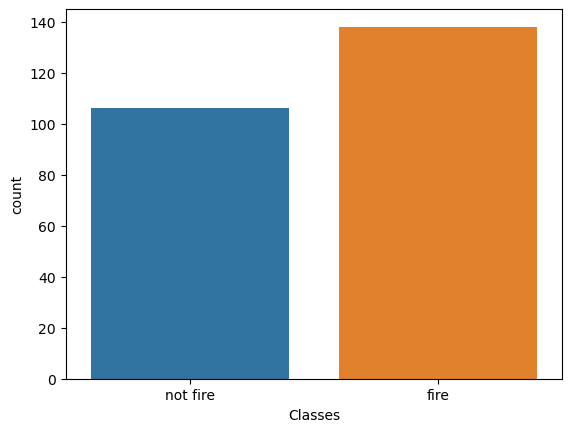

In [36]:
# First of all lets see output class is balanced or not

sns.countplot(df.Classes)

<AxesSubplot:xlabel='Classes', ylabel='count'>

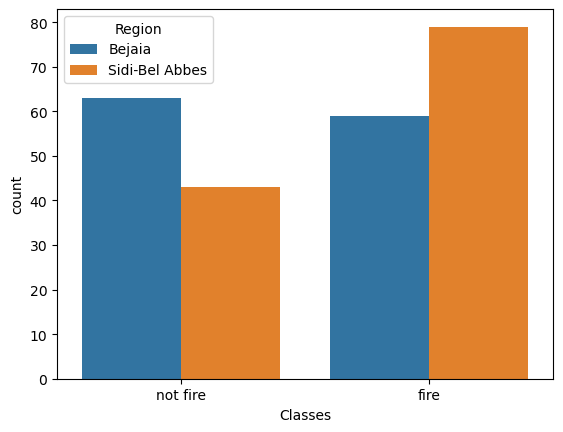

In [37]:
sns.countplot(x=df.Classes, hue=df.Region)

# 'Sid-Bei Abbes' region has more numbers of fire incidents than 'Bejaia' region

In [38]:
group1 = df.groupby(['Region','Classes']).agg({'Classes':['count']})

cm = sns.dark_palette("red", as_cmap=True)
group1.style.background_gradient(cmap=cm)

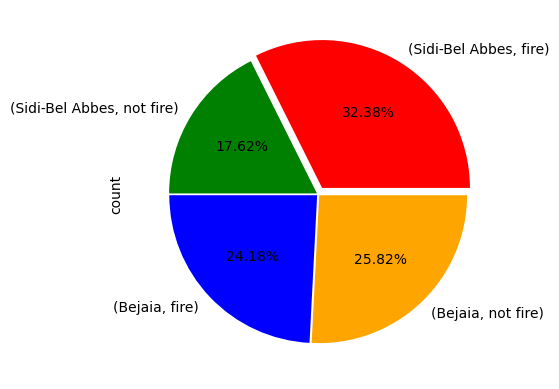

In [39]:
colors = ['blue', 'orange', 'red','green']
explode = (0.01,0.01,0.05,0.01)

group1.plot(kind='pie', y='Classes', autopct='%1.2f%%', colors=colors, explode=explode, startangle=180, legend=None)
plt.show()

<AxesSubplot:xlabel='day_name', ylabel='count'>

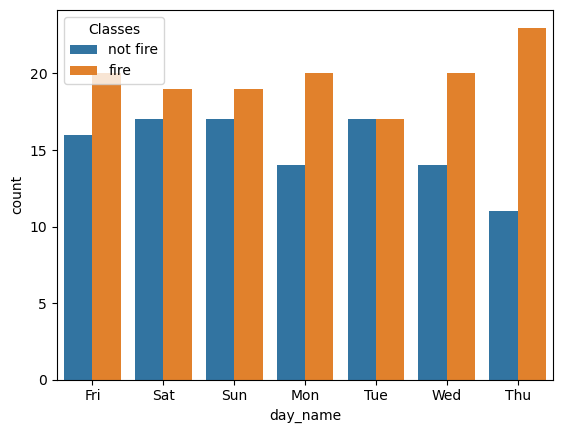

In [40]:
sns.countplot(x=df.day_name, hue=df.Classes)

# Most of the fire incidents occured on Thursday
# Minimum fire incidents occured on Tuesday

In [41]:
pivot1 = pd.pivot_table(df, index=['Classes','day_name'], aggfunc={'Classes':len})

cm = sns.light_palette("red", as_cmap=True)
pivot1.style.background_gradient(cmap=cm)

# Thursday has 23 numbers of fire incidents (Maximum)
# Tuesday has 17 numbers of fire incidents (Minimum)

<AxesSubplot:xlabel='date', ylabel='Temperature'>

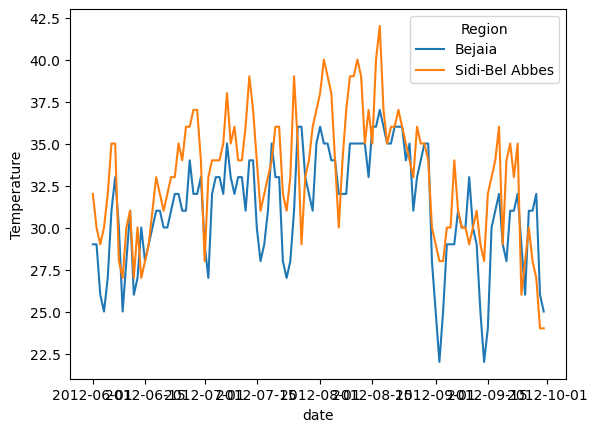

In [42]:
sns.lineplot(x='date', y='Temperature', hue='Region', data=df)

# 'Sid-Bei Abbes' region is hotter than 'Bejaia' region

In [43]:
temp_col = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'day_name']

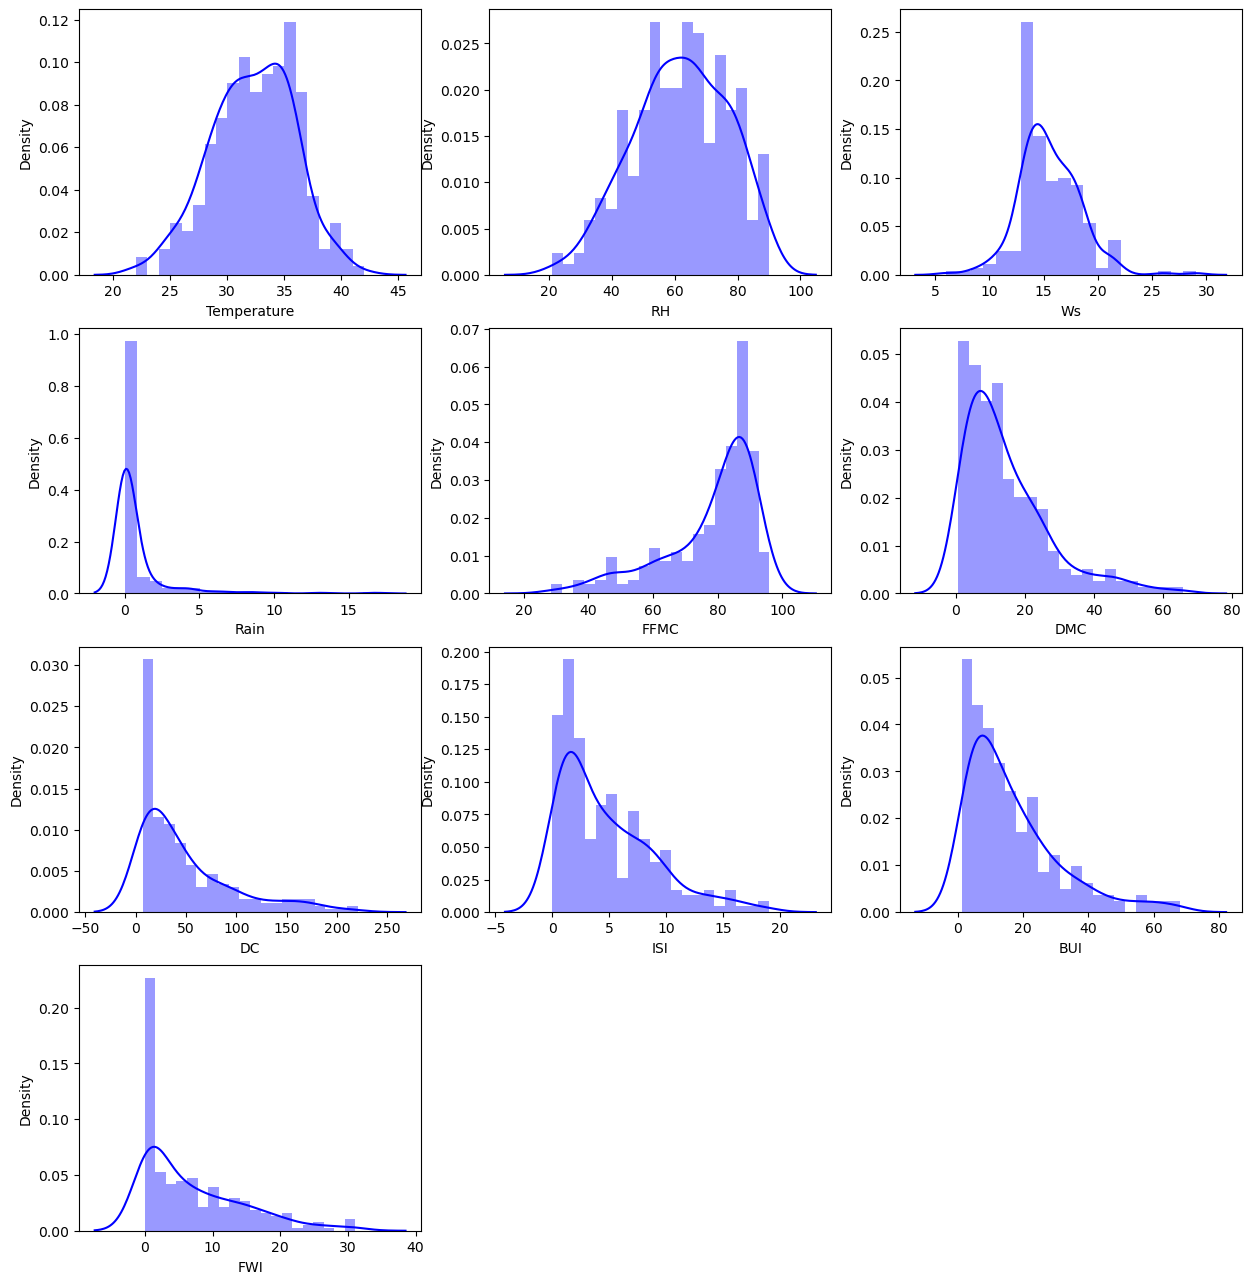

In [44]:
plt.figure(figsize=(15,20))
for enum, feature in enumerate(temp_col):
    if feature not in ['Region', 'day_name']:        
        plt.subplot(5, 3, enum+1)
        sns.distplot(df[feature], color='b', bins =20)
        plt.xlabel(feature)
        plt.show

In [45]:
# Temprature, RH and WS follows somewhat Normal Distribution
# FMMC is Left skewed
# Rain, DMC, DC, ISI, BUI and FWI are Right skewed (follows Log-Normal distribution)

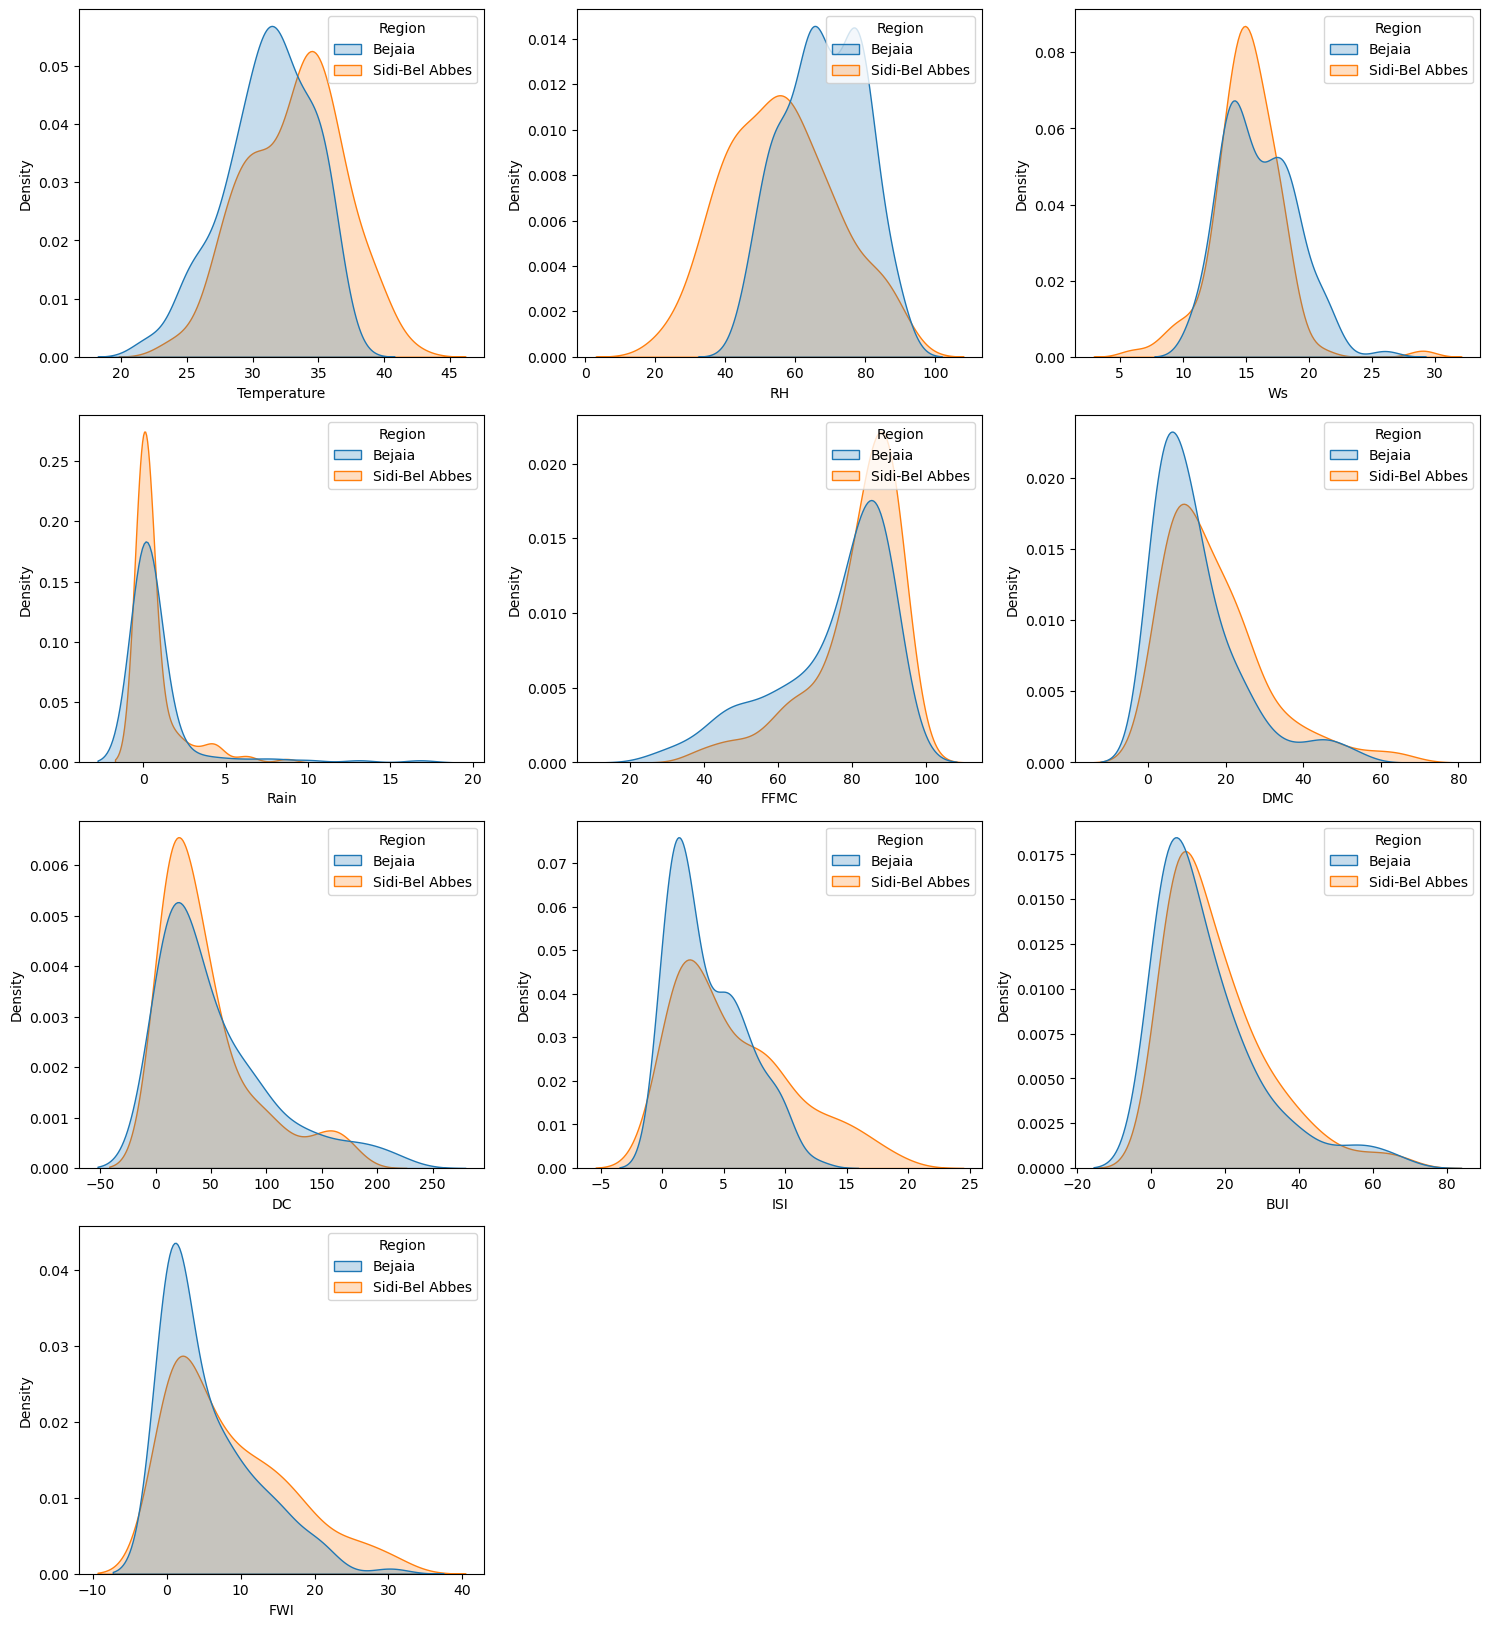

In [46]:
plt.figure(figsize=(15,20))
for enum, feature in enumerate(temp_col):
    if feature not in ['Region', 'day_name']:  
        plt.subplot(5, 3, enum+1)
        sns.kdeplot(df[feature], shade=True, hue='Region', data=df)
        plt.xlabel(feature)
        plt.tight_layout()

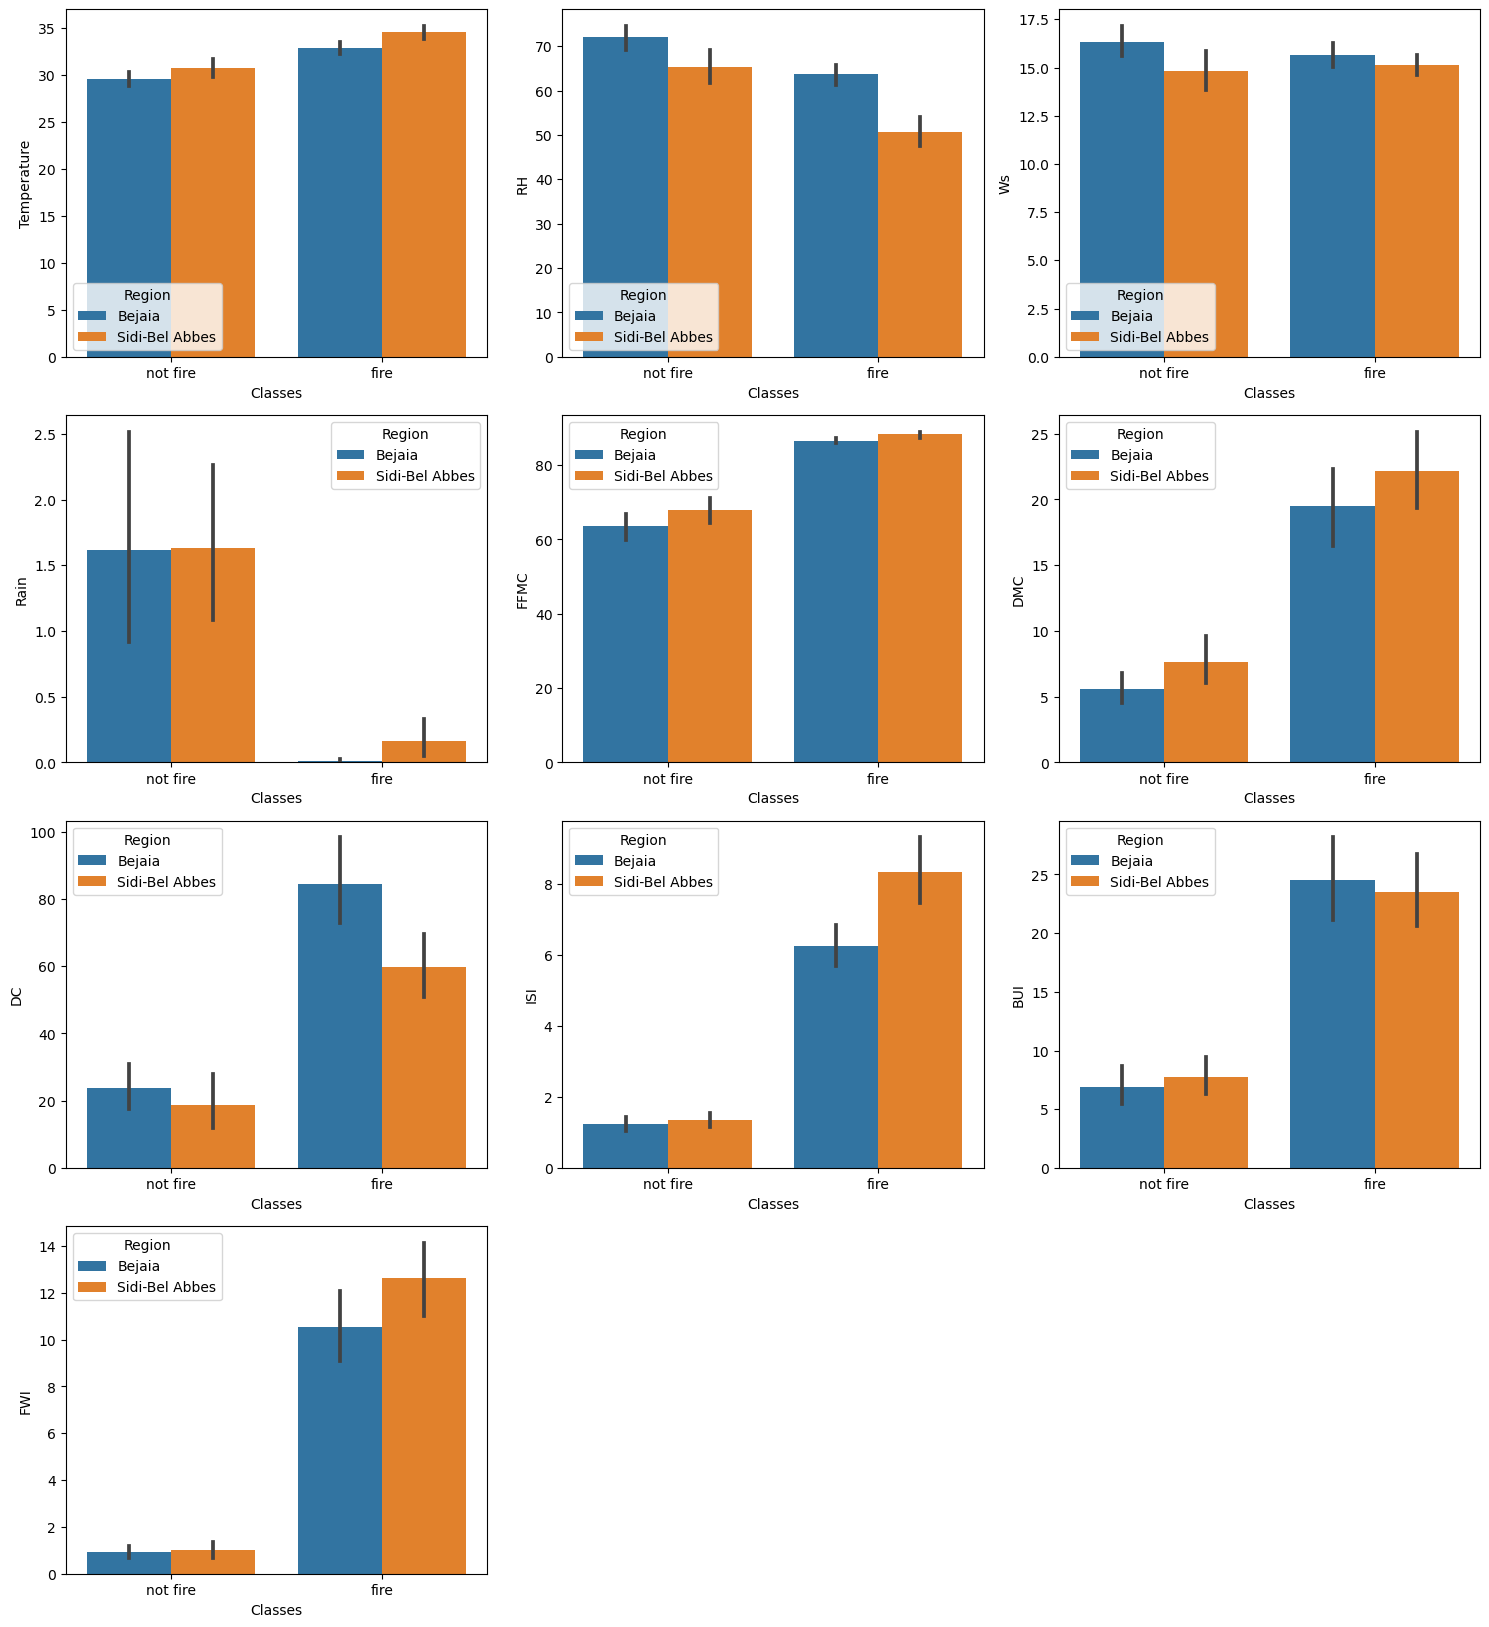

In [47]:
plt.figure(figsize=(15, 20))
for enum, feature in enumerate(temp_col):
    if feature not in ['Region', 'day_name']:  
        plt.subplot(5, 3, enum+1)
        sns.barplot(x='Classes', y=df[feature], hue = df['Region'], data=df)
        plt.tight_layout()
    

In [48]:
# Lower the rain higher the incidents of fire
# Higher the DMC, DC, ISI, BUI and FWI higher the incidents of fire
# range can be viewed using stripplot below

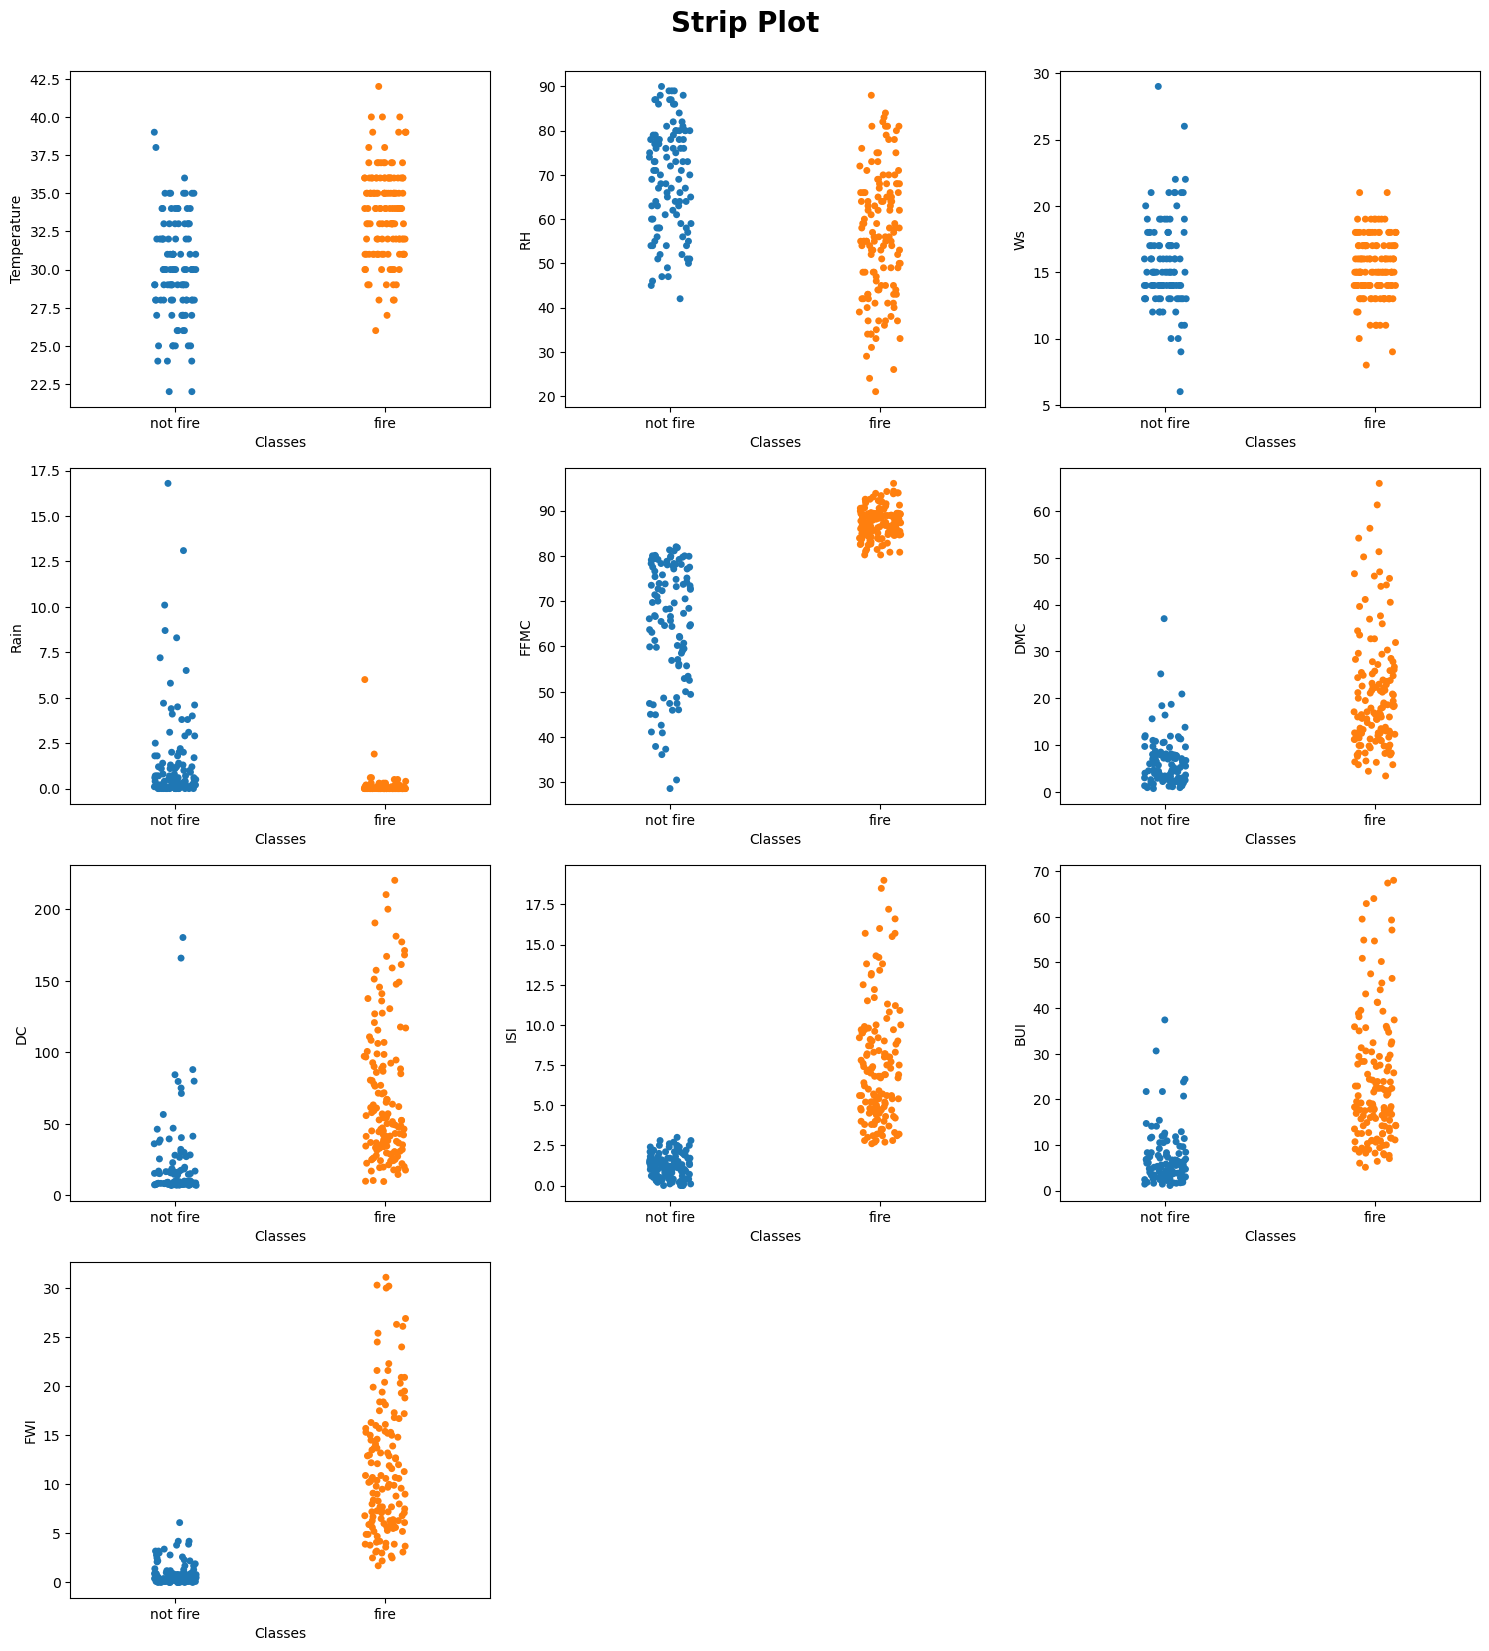

In [49]:
plt.figure(figsize=(15, 20))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for enum, feature in enumerate(temp_col):
    if feature not in ['Region', 'day_name']:   
        plt.subplot(5,3, enum+1)
        sns.stripplot(x='Classes', y=df[feature] , data=df)
        plt.tight_layout()

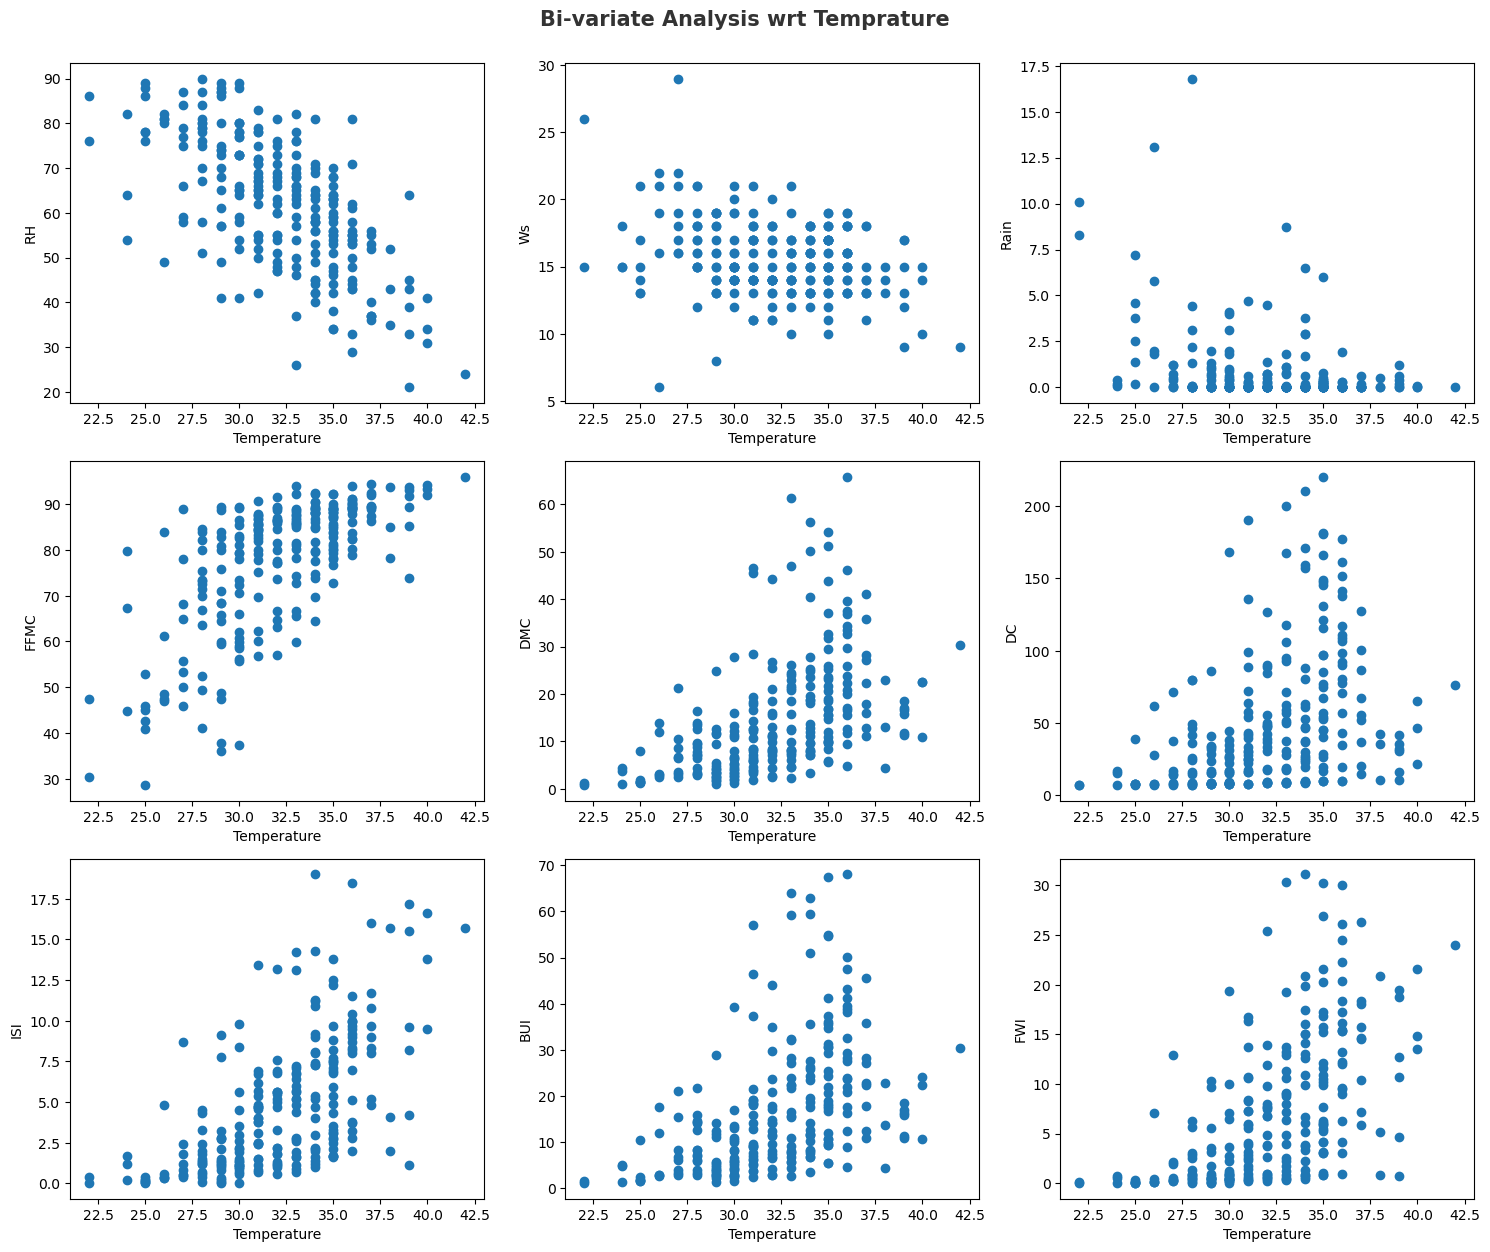

In [50]:
plt.figure(figsize=(15,20))
plt.suptitle('Bi-variate Analysis wrt Temprature', fontsize=15, fontweight='bold', alpha=0.8, y=1.0)

for i in range(len(temp_col)):   
    if temp_col[i] not in ['Temperature','Region', 'day_name']:  
        plt.subplot(5, 3, i)
        plt.scatter(df['Temperature'], df[temp_col[i]])
        plt.xlabel('Temperature')
        plt.ylabel(temp_col[i])
        plt.tight_layout()

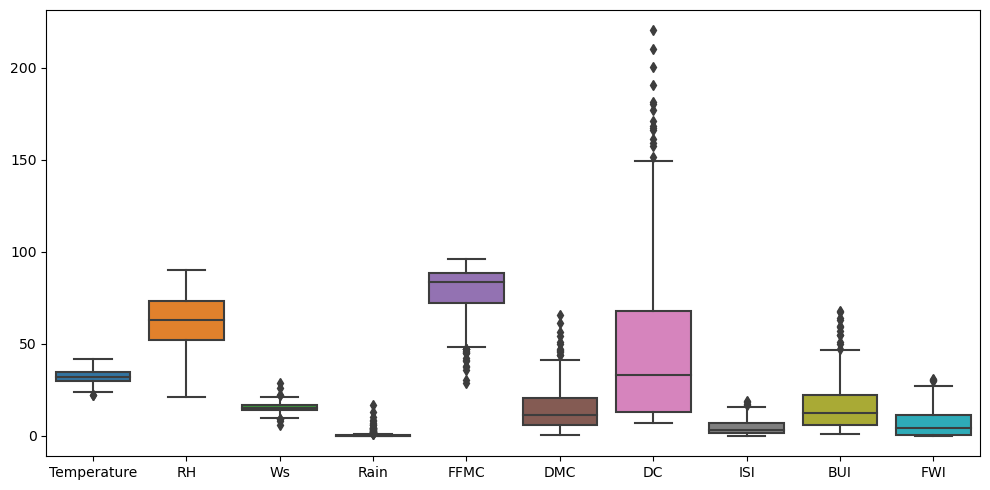

In [51]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(orient='v', data=df[temp_col])
plt.tight_layout()

<AxesSubplot:>

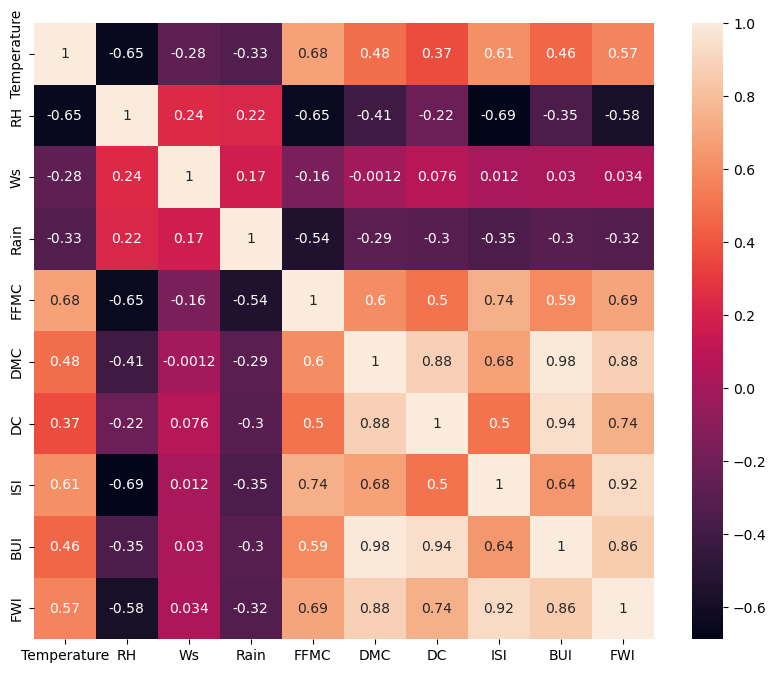

In [52]:
plt.figure(figsize = (10,8))
sns.heatmap(df[temp_col].corr(), annot = True)

In [53]:
# BUI is correlated DMC and DC
# FWI is correlated ISI

In [54]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'date', 'day_name',
       'Classes'],
      dtype='object')

In [55]:
data = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'Classes']]

In [56]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,Bejaia,not fire
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,Bejaia,not fire
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,Bejaia,not fire
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,Bejaia,not fire
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,Bejaia,not fire


In [57]:
# Feature encoding:

def feature_encoding(df, col):
    temp_list = list(sorted(df[col].unique()))
    return dict(zip(temp_list, range(len(temp_list))))  

In [58]:
feature_encoder_region = feature_encoding(data,'Region')
feature_encoder_region

{'Bejaia': 0, 'Sidi-Bel Abbes': 1}

In [59]:
feature_encoder_classes = feature_encoding(data,'Classes')
feature_encoder_classes

{'fire': 0, 'not fire': 1}

In [60]:
import pickle
pickle.dump(feature_encoder_region, open('feature_encoder_region.pkl','wb'))
pickle.dump(feature_encoder_classes, open('feature_encoder_classes.pkl','wb'))

In [61]:
data['Region'] = data['Region'].map(feature_encoder_region)
data['Classes'] = data['Classes'].map(feature_encoder_classes)

In [62]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [63]:
data.Region.value_counts()

0    122
1    122
Name: Region, dtype: int64

In [64]:
data.Classes.value_counts()

0    138
1    106
Name: Classes, dtype: int64

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Region       244 non-null    int64  
 14  Classes      244 non-null    int64  
dtypes: float64(10), int64(5)
memory usage: 28.7 KB


In [66]:
for feature in data.columns[:-1]:
    data[feature]= data[feature].astype('float64')

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    float64
 1   month        244 non-null    float64
 2   year         244 non-null    float64
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Region       244 non-null    float64
 14  Classes      244 non-null    int64  
dtypes: float64(14), int64(1)
memory usage: 28.7 KB


In [68]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,1
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,1
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,1
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,1


In [69]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [70]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0


In [71]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [73]:
X_train

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
234,21.0,9.0,2012.0,35.0,34.0,17.0,0.0,92.2,23.6,97.3,13.8,29.4,21.6,1.0
227,14.0,9.0,2012.0,28.0,81.0,15.0,0.0,84.6,12.6,41.5,4.3,14.3,5.7,1.0
180,29.0,7.0,2012.0,34.0,59.0,16.0,0.0,88.1,19.5,47.2,7.4,19.5,10.9,1.0
5,6.0,6.0,2012.0,31.0,67.0,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0.0
56,27.0,7.0,2012.0,36.0,48.0,13.0,0.0,90.3,22.2,108.5,8.7,29.4,15.3,0.0
125,4.0,6.0,2012.0,30.0,64.0,14.0,0.0,79.4,5.2,15.4,2.2,5.6,1.0,1.0
148,27.0,6.0,2012.0,36.0,55.0,15.0,0.0,89.1,20.9,43.3,8.0,20.8,12.0,1.0
114,23.0,9.0,2012.0,32.0,54.0,11.0,0.5,73.7,7.9,30.4,1.2,9.6,0.7,0.0
65,5.0,8.0,2012.0,34.0,65.0,13.0,0.0,86.8,11.1,29.7,5.2,11.5,6.1,0.0
132,11.0,6.0,2012.0,31.0,42.0,21.0,0.0,90.6,18.2,30.5,13.4,18.0,16.7,1.0


In [74]:
X_test

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
24,25.0,6.0,2012.0,31.0,64.0,15.0,0.0,86.7,14.2,63.8,5.7,18.3,8.4,0.0
6,7.0,6.0,2012.0,33.0,54.0,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0.0
153,2.0,7.0,2012.0,33.0,48.0,16.0,0.0,87.6,7.9,17.8,6.8,7.8,6.4,1.0
211,29.0,8.0,2012.0,35.0,53.0,17.0,0.5,80.2,20.7,149.2,2.7,30.6,5.9,1.0
198,16.0,8.0,2012.0,40.0,41.0,10.0,0.1,92.0,22.6,65.1,9.5,24.2,14.8,1.0
176,25.0,7.0,2012.0,39.0,64.0,9.0,1.2,73.8,11.7,15.9,1.1,11.4,0.7,1.0
192,10.0,8.0,2012.0,39.0,39.0,15.0,0.2,89.3,15.8,35.4,8.2,15.8,10.7,1.0
124,3.0,6.0,2012.0,29.0,80.0,14.0,2.0,48.7,2.2,7.6,0.3,2.6,0.1,1.0
9,10.0,6.0,2012.0,28.0,79.0,12.0,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0.0
101,10.0,9.0,2012.0,33.0,73.0,12.0,1.8,59.9,2.2,8.9,0.7,2.7,0.3,0.0


In [75]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

In [76]:
X_train=scaler.fit_transform(X_train)

In [77]:
X_test=scaler.transform(X_test)

In [78]:
X_train

array([[ 0.4       ,  1.        ,  0.        , ...,  1.05373134,
         1.57589286,  0.        ],
       [-0.06666667,  1.        ,  0.        , ...,  0.15223881,
         0.15625   ,  0.        ],
       [ 0.93333333,  0.        ,  0.        , ...,  0.46268657,
         0.62053571,  0.        ],
       ...,
       [-0.93333333,  1.        ,  0.        , ..., -0.59402985,
        -0.34375   , -1.        ],
       [ 0.86666667,  0.        ,  0.        , ...,  0.2358209 ,
         0.45089286,  0.        ],
       [-0.26666667,  1.        ,  0.        , ..., -0.55820896,
        -0.32589286, -1.        ]])

In [79]:
X_test

array([[ 0.66666667, -0.5       ,  0.        , ...,  0.39104478,
         0.39732143, -1.        ],
       [-0.53333333, -0.5       ,  0.        , ..., -0.05074627,
         0.29017857, -1.        ],
       [-0.86666667,  0.        ,  0.        , ..., -0.2358209 ,
         0.21875   ,  0.        ],
       ...,
       [-0.8       ,  1.        ,  0.        , ..., -0.34328358,
        -0.12946429,  0.        ],
       [ 0.26666667,  0.5       ,  0.        , ...,  1.16716418,
         1.18303571, -1.        ],
       [ 1.        , -0.5       ,  0.        , ...,  0.9880597 ,
         0.79910714, -1.        ]])

In [80]:
pickle.dump(scaler, open('Algerian_scaler.pkl','wb'))

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, confusion_matrix

In [82]:
log_model = LogisticRegression()

In [83]:
log_model = log_model.fit(X_train, y_train)

In [84]:
log_model

LogisticRegression()

In [85]:
log_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [86]:
y_pred = log_model.predict(X_test)

In [87]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [88]:
log_model.predict_proba([X_test[1]])

array([[0.96109095, 0.03890905]])

In [89]:
type(y_test)

pandas.core.series.Series

In [90]:
y_test.iloc[1]

0

In [91]:
cm =confusion_matrix(y_test,y_pred)
cm

array([[44,  3],
       [ 0, 27]], dtype=int64)

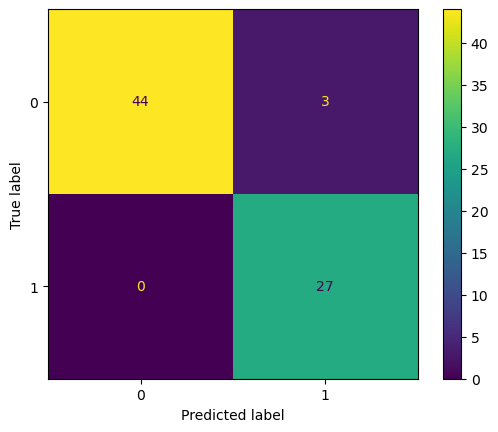

In [92]:
cm_display= ConfusionMatrixDisplay(cm)
cm_display.plot()

In [93]:
accuracy_score(y_test,y_pred)

0.9594594594594594

In [94]:
precision_score(y_test,y_pred)

0.9

In [95]:
recall_score(y_test,y_pred)

1.0

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        47
           1       0.90      1.00      0.95        27

    accuracy                           0.96        74
   macro avg       0.95      0.97      0.96        74
weighted avg       0.96      0.96      0.96        74



####  The choice of the algorithm depends on the penalty chosen: Supported penalties by solver:
‘liblinear’ - [‘l1’, ‘l2’]

‘saga’ - [‘l1’, ‘l2’, ‘elasticnet’, ‘none’]

‘lbfgs’ - [‘l2’, ‘none’]

‘newton-cg’ - [‘l2’, ‘none’]

‘sag’ - [‘l2’, ‘none’]

In [97]:
log_liblinear = LogisticRegression(solver='liblinear')
log_liblinear.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [98]:
log_liblinear.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [99]:
y_pred_liblinear = log_liblinear.predict(X_test)

In [100]:
confusion_matrix(y_test, y_pred_liblinear)

array([[44,  3],
       [ 0, 27]], dtype=int64)

In [101]:
accuracy_score(y_test, y_pred_liblinear)

0.9594594594594594

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [103]:
dt_model = DecisionTreeClassifier()

In [104]:
dt_model = dt_model.fit(X_train, y_train)

In [105]:
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [106]:
y_pred_dt = dt_model.predict(X_test)

In [107]:
confusion_matrix(y_test, y_pred_dt)

# DT Seems to be overfitted 

array([[46,  1],
       [ 1, 26]], dtype=int64)

In [108]:
accuracy_score(y_test, y_pred_dt)

0.972972972972973

In [109]:
rf_model = RandomForestClassifier()

In [110]:
rf_model = rf_model.fit(X_train, y_train)

In [111]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [112]:
y_pred_rf = rf_model.predict(X_test)

In [113]:
y_pred_rf

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [114]:
confusion_matrix(y_test, y_pred_rf)

array([[46,  1],
       [ 0, 27]], dtype=int64)

In [115]:
accuracy_score(y_test, y_pred_rf)

0.9864864864864865

In [116]:
pickle.dump(log_model, open('Algerian_log_model.pkl','wb'))
pickle.dump(log_liblinear, open('Algerian_liblinear_model.pkl','wb'))
pickle.dump(rf_model, open('Algerian_rf_model.pkl','wb'))
